# Assignment #1

Author:  Robin Hurtado (from Jupiter notebook provided by Professor Abramowitz)

Collaborators:

Integrity Statement: Did you use an LLM to write any of the code in your assignment? (Y/N): N

# Instructions

You are permitted to work with a partner in the class to complete your assignment, but no more than one partner. However, every student must submit their own copy of the assignment, and must list your collaborators.

You should refer to your textbook and posted course materials as resources. You are also allowed to use the documentation for python, pandas, matplotlib, and seaborn. You may not use other online resources or LLMs for this assignment.

You will be graded based on (1) correctness, (2) completeness, (3) documentation, and (4) overall readability of your notebook. The assignment will be worth a total of 100 points in the Homework category (15% of your grade).

**Submission and Deadline: This assignment must be submitted on Canvas before class begins on Wednesday, September 17.**

You must complete all of the steps below:

1. Organize your project in a project folder (or repo) with three subfolders: src, data, and presentations. Place the provided dataset in the data folder, and the two provided notebooks in the src folder.
2. Use a python virtual environment, install the libraries you use, and create a requirements.txt file (using `pip freeze`)
3. Open and read through the provided data cleaning notebook to understand the cleaning process and all of its operations. (Fair game).
4. Run the separate notebook provided for cleaning the CDC data. It should create a new file. You do not need to edit that notebook at all, and only need to run it once. All coding will take place in this notebook.

The rest of the assignment should be completed in this notebook:

1. Read in the clean data in from the provided csv file and write code to examine it and understand it
2. Write code to determine which cancer site had the highest incidence of new cases for females in each individual year included in the dataset, and present your results
3. Create a line plot for All Invasive Cancer Sites with x-axis = year, y-axis = incidence of cancer cases, and a separate line for Males and Females (two lines total)
4. Create a line plot for females with x-axis = year, y-axis = incidence of cancer, and a separate line for each individual cancer site (many lines)
5. Create a scatter plot with a single marker for each (site, sex) pair in 2000, with x-axis = population, y-axis = incidence of cancer cases. Use a different color marker for Males and Females
6. Create a bar plot with a bar for each individual cancer site (excluding the all-inclusive case), and bar length based on the incidence of new cases for males in the year 2000
7. For each cancer site and each year, determine whether males or females had the higher incidence (hint: groupby)
8. Create a pivot table with a row for each cancer site, column for each year, and a value equal to the total incidence of males and females combined

9. Add your full name and the full names of your collaborator (if any) at the top of this document. Answer the integrity statement. 
10. Submit this notebook on Canvas together with the requirements.txt file

**NOTE:** For each plot, add a descriptive title and label the axes appropriately, and remark on any observations that you make.

**HINT #1:** Most problems can be solved by some combination of filtering and/or groupby before aggregating (e.g., taking the max) and plotting.

**HINT #2:** You can solve these problems in any order, so do the ones you find easiest first and the rest will start to feel easier.

**Useful Documentation**
- Pandas general documentation: https://pandas.pydata.org/docs/user_guide/index.html
- Pandas dataframe reshaping: https://pandas.pydata.org/docs/user_guide/reshaping.html
- Pandas Copy-on-Write: https://pandas.pydata.org/docs/user_guide/copy_on_write.html
- Pandas missing data: https://pandas.pydata.org/docs/user_guide/missing_data.html
- Pandas split-apply-combine (groupby, agg): https://pandas.pydata.org/docs/user_guide/groupby.html 

- Matplotlib documentation: https://matplotlib.org/stable/plot_types/index.html
- Seaborn documentation: https://seaborn.pydata.org/


# Imports and CoW

In [274]:
#Uncomment the libraries you need. Be sure to install whichever ones you need into your Python virtual environment. You may also need to also install Jupyter or iPython to run your notebook, depending on your setup.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

In [275]:
pd.set_option('mode.copy_on_write', True) # will be the default in pandas 3.0, best to enforce it

# 1. Read in Data

In [276]:
cwd = Path().cwd() # folder containing this notebook
project_folder = cwd.parent # project folder containing the src folder
dataset_path = Path('data/clean_cdc_cancer.csv') #using a data folder makes life easier

file = project_folder / dataset_path #join the project folder with the dataset path

if not file.exists():
    raise FileNotFoundError(f"Dataset file not found: {file}")

df_cancer_clean = pd.read_csv(file)

# selecting a

# Removing Redundant Data 
When working with the breast cancer data, I found that when working with just male or just female date, the Site Categories with "Male and Female Breast..." had duplicate values to the individual sex numbers. 
Prove that when working with just male or just female data, 'Male and Female Breast Cancer' is a duplicate of the respective Sex' Breast Cancer data,
and Male and Female Breast Cancer, in Situ' is a duplicate of the respective Sex' Breast Cancer, In Situ data

I also found that when including 'All Invasive Cancer Sites Combined' the scale of graphs is thrown way off.  Although this Cancer Site likely contains duplicate data, I was unable to figure out exactly which categories it duplicates, and was unable to find the Data Dictionary for this dataset online. 
So I include it, but on some results, I include a result with 'All Invasive Combined' and one without. 

### Proof that Combined Breast Cancer Data is Duplicate to Breast Cancer Data separated by Sex

In [277]:

# Choose only breast cancer sites
df_breast_cancers = df_cancer_clean[(df_cancer_clean['Cancer Sites'] == 'Male Breast') | (df_cancer_clean['Cancer Sites'] =='Male Breast, In Situ') 
                                    | (df_cancer_clean['Cancer Sites'] == 'Female Breast') | (df_cancer_clean['Cancer Sites'] =='Female Breast, In Situ')
                                    | (df_cancer_clean['Cancer Sites'] =='Male and Female Breast') | (df_cancer_clean['Cancer Sites'] =='Male and Female Breast, In Situ')]

#choose only data where sex is M
df_breast_cancers_m = df_breast_cancers[df_cancer_clean['Sex'] == 'M']

# 'Male Breast Cancer' vs Male Portion of 'Male and Femal Breast Cancer' 
# get the count of of the Male 'Breast Cancer' site.  Have to reset index so the original indexes aren't retained so we can accuratley compare the counts later
male_breast_cancer_count = df_breast_cancers_m[df_breast_cancers_m['Cancer Sites'] == 'Male Breast']['Count'].reset_index()['Count']
# get the count of of the Male 'Male and Female Breast Cancer' site.  Again, reset index so we can compare later
male_portion_of_maleandfemale_breast_cancer_count = df_breast_cancers_m[df_breast_cancers_m['Cancer Sites'] == 'Male and Female Breast']['Count'].reset_index()['Count']

# 'Male Breast Cancer, in Situ' vs Male Portion of 'Male and Femal Breast Cancer, in Situ' 
# get the count of of the Male 'Breast Cancer' site.  Have to reset index so the original indexes aren't retained so we can accuratley compare the counts later
male_breast_cancer_insitu_count = df_breast_cancers_m[df_breast_cancers_m['Cancer Sites'] == 'Male Breast, In Situ']['Count'].reset_index()['Count']
# get the count of of the Male 'Male and Female Breast Cancer' site.  Again, reset index so we can compare later
male_portion_of_maleandfemale_breast_cancer_insitu_count = df_breast_cancers_m[df_breast_cancers_m['Cancer Sites'] == 'Male and Female Breast, In Situ']['Count'].reset_index()['Count']


# Repeat for Female Breast Cancer and Breast Cancer, in Situ
#choose female Breast Cancers
df_breast_cancers_f = df_breast_cancers[df_cancer_clean['Sex'] == 'F']

# get counts for female breast cancers
female_breast_cancer_count = df_breast_cancers_f[df_breast_cancers_f['Cancer Sites'] == 'Female Breast']['Count'].reset_index()['Count']
female_portion_of_maleandfemale_breast_cancer_count = df_breast_cancers_f[df_breast_cancers_f['Cancer Sites'] == 'Male and Female Breast']['Count'].reset_index()['Count']

# get counts for female breast cancers, in situ
female_breast_cancer_insitu_count = df_breast_cancers_f[df_breast_cancers_f['Cancer Sites'] == 'Female Breast, In Situ']['Count'].reset_index()['Count']
female_portion_of_maleandfemale_breast_cancer_insitu_count = df_breast_cancers_f[df_breast_cancers_f['Cancer Sites'] == 'Male and Female Breast, In Situ']['Count'].reset_index()['Count']

# Display results
print("'Male Breast Cancer' Counts are duplicates of Male Portion of 'Male and Female Breast Cancer' counts: ", male_breast_cancer_count.equals(male_portion_of_maleandfemale_breast_cancer_count))
print("'Male Breast Cancer, In Situ' Counts are duplicates of Male Portion of 'Male and Female Breast Cancer, In Situ' counts: ", male_breast_cancer_insitu_count.equals(male_portion_of_maleandfemale_breast_cancer_insitu_count))
print("'Female Breast Cancer, In Situ' Counts are duplicates of Female Portion of 'Male and Female Breast Cancer, In Situ' counts: ", female_breast_cancer_count.equals(female_portion_of_maleandfemale_breast_cancer_count))
print("'Female Breast Cancer, In Situ' Counts are duplicates of Female Portion of 'Male and Female Breast Cancer, In Situ' counts: ", female_breast_cancer_insitu_count.equals(female_portion_of_maleandfemale_breast_cancer_insitu_count))



'Male Breast Cancer' Counts are duplicates of Male Portion of 'Male and Female Breast Cancer' counts:  True
'Male Breast Cancer, In Situ' Counts are duplicates of Male Portion of 'Male and Female Breast Cancer, In Situ' counts:  True
'Female Breast Cancer, In Situ' Counts are duplicates of Female Portion of 'Male and Female Breast Cancer, In Situ' counts:  True
'Female Breast Cancer, In Situ' Counts are duplicates of Female Portion of 'Male and Female Breast Cancer, In Situ' counts:  True


C:\Users\robin\AppData\Local\Temp\ipykernel_28076\3749731933.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_breast_cancers_m = df_breast_cancers[df_cancer_clean['Sex'] == 'M']
C:\Users\robin\AppData\Local\Temp\ipykernel_28076\3749731933.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_breast_cancers_f = df_breast_cancers[df_cancer_clean['Sex'] == 'F']


In [278]:
# create dataframe with redundant values removed
# Choose all rows except those that are 'Male and Female Breast'
df_cancer_clean_nonredundant = df_cancer_clean[df_cancer_clean['Cancer Sites'] != 'Male and Female Breast'] 
 # Choose all rows except those that are 'Male and Female Breast, In Situ'
df_cancer_clean_nonredundant = df_cancer_clean_nonredundant[df_cancer_clean_nonredundant['Cancer Sites'] != 'Male and Female Breast, In Situ']

# create a version of the nonredundant dataframe with the All Invasive Datasites Combined removed
df_cancer_clean_nonredundant_excl_allinv = df_cancer_clean_nonredundant[df_cancer_clean_nonredundant['Cancer Sites'] != 'All Invasive Cancer Sites Combined']

# 2. Incidence for Females Each Year

Write code to determine which cancer site had the highest incidence of new cases for females in each year 1999-2022 (hint: filter then groupby then agg)

Results excluding All Invasive shown
Results including All Invasive follows below

In [279]:
# select the rows that are for only females
df_cancer_females = df_cancer_clean_nonredundant[df_cancer_clean_nonredundant['Sex'] == 'F'] 
# select the rows except those for All Invasive Combines
df_cancer_females_excl_allinv = df_cancer_clean_nonredundant_excl_allinv[df_cancer_clean_nonredundant_excl_allinv['Sex'] == 'F']

# group by year and aggregate by sum
df_cancer_females_excl_allinv_grpd = df_cancer_females_excl_allinv.groupby('Year').sum()
# retrieve indexes for the sites that have the highest count excluding All Invasive Compbined
idx_exl_allinv = df_cancer_females_excl_allinv.groupby(['Year'])['Count'].idxmax()

# retrieve Cancer Sites for indexes that had the highest Counts
df_f_high_inc_by_exl_allinv = df_cancer_females.loc[idx_exl_allinv][['Year', 'Cancer Sites']]

print("Highest incidence of new cases for females each year excluding 'All Invasive Cancer Sites Combined' is \n", df_f_high_inc_by_exl_allinv)

Highest incidence of new cases for females each year excluding 'All Invasive Cancer Sites Combined' is 
       Year   Cancer Sites
2496  1999  Female Breast
2497  2000  Female Breast
2498  2001  Female Breast
2499  2002  Female Breast
2500  2003  Female Breast
2501  2004  Female Breast
2502  2005  Female Breast
2503  2006  Female Breast
2504  2007  Female Breast
2505  2008  Female Breast
2506  2009  Female Breast
2507  2010  Female Breast
2508  2011  Female Breast
2509  2012  Female Breast
2510  2013  Female Breast
2511  2014  Female Breast
2512  2015  Female Breast
2513  2016  Female Breast
2514  2017  Female Breast
2515  2018  Female Breast
2516  2019  Female Breast
2517  2020  Female Breast
2518  2021  Female Breast
2519  2022  Female Breast


In [280]:
# repeat including All Invasive Cancer Sites Combined
# group by year and aggregate by sum
df_cancer_females_grpd = df_cancer_females.groupby('Year').sum()
# retrieve indexes for the sites that have the highest count
idx = df_cancer_females.groupby(['Year'])['Count'].idxmax()

# retrieve Cancer Sites for indexes that had the highest Counts
df_f_high_inc_by = df_cancer_females.loc[idx][['Year', 'Cancer Sites']]

print("Highest incidence of new cases for females each year including 'All Invasive Cancer Sites Combined' is \n", df_f_high_inc_by)


Highest incidence of new cases for females each year including 'All Invasive Cancer Sites Combined' is 
     Year                        Cancer Sites
0   1999  All Invasive Cancer Sites Combined
2   2000  All Invasive Cancer Sites Combined
4   2001  All Invasive Cancer Sites Combined
6   2002  All Invasive Cancer Sites Combined
8   2003  All Invasive Cancer Sites Combined
10  2004  All Invasive Cancer Sites Combined
12  2005  All Invasive Cancer Sites Combined
14  2006  All Invasive Cancer Sites Combined
16  2007  All Invasive Cancer Sites Combined
18  2008  All Invasive Cancer Sites Combined
20  2009  All Invasive Cancer Sites Combined
22  2010  All Invasive Cancer Sites Combined
24  2011  All Invasive Cancer Sites Combined
26  2012  All Invasive Cancer Sites Combined
28  2013  All Invasive Cancer Sites Combined
30  2014  All Invasive Cancer Sites Combined
32  2015  All Invasive Cancer Sites Combined
34  2016  All Invasive Cancer Sites Combined
36  2017  All Invasive Cancer Sites Comb

# 3. Line plots for male and female, all sites

Create a line plot for All Invasive Cancer Sites with x-axis = year, y-axis = incidence of cancer cases, and a separate line for Males and Females (two lines total)

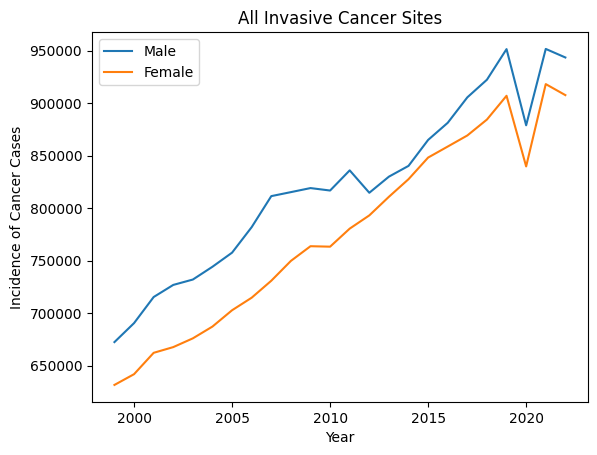

In [281]:
# create dataframe with All Invasive Cancer Sites Combined for Males only 
df_male_combined = df_cancer_clean[(df_cancer_clean['Sex']=='M') & (df_cancer_clean['Cancer Sites'] == 'All Invasive Cancer Sites Combined')][['Year', 'Count']]
# create dataframe with All Invasive Cancer Sites Combined for Females only 
df_female_combined = df_cancer_clean[(df_cancer_clean['Sex']=='F') & (df_cancer_clean['Cancer Sites'] == 'All Invasive Cancer Sites Combined')][['Year', 'Count']]

# create line plot for male data
plt.plot(df_male_combined['Year'], df_male_combined['Count'], label = 'Male')
# plot line for female data on the same plot
plt.plot(df_female_combined['Year'], df_female_combined['Count'], label = 'Female')

# add graph title, xy labels, and legend to decipher male vs female plot
plt.title('All Invasive Cancer Sites')
plt.xlabel('Year')
plt.ylabel('Incidence of Cancer Cases')
plt.legend()
plt.show()

# 4. Line plots for cancer sites

 Create a line plot for females with x-axis = year, y-axis = incidence of cancer, and a separate line for each cancer site (many lines)

Plot shown excluding 'All Invasive Cancer Sites Combined'
Plot including 'All Invasive Cancer Sites Combined' follows below

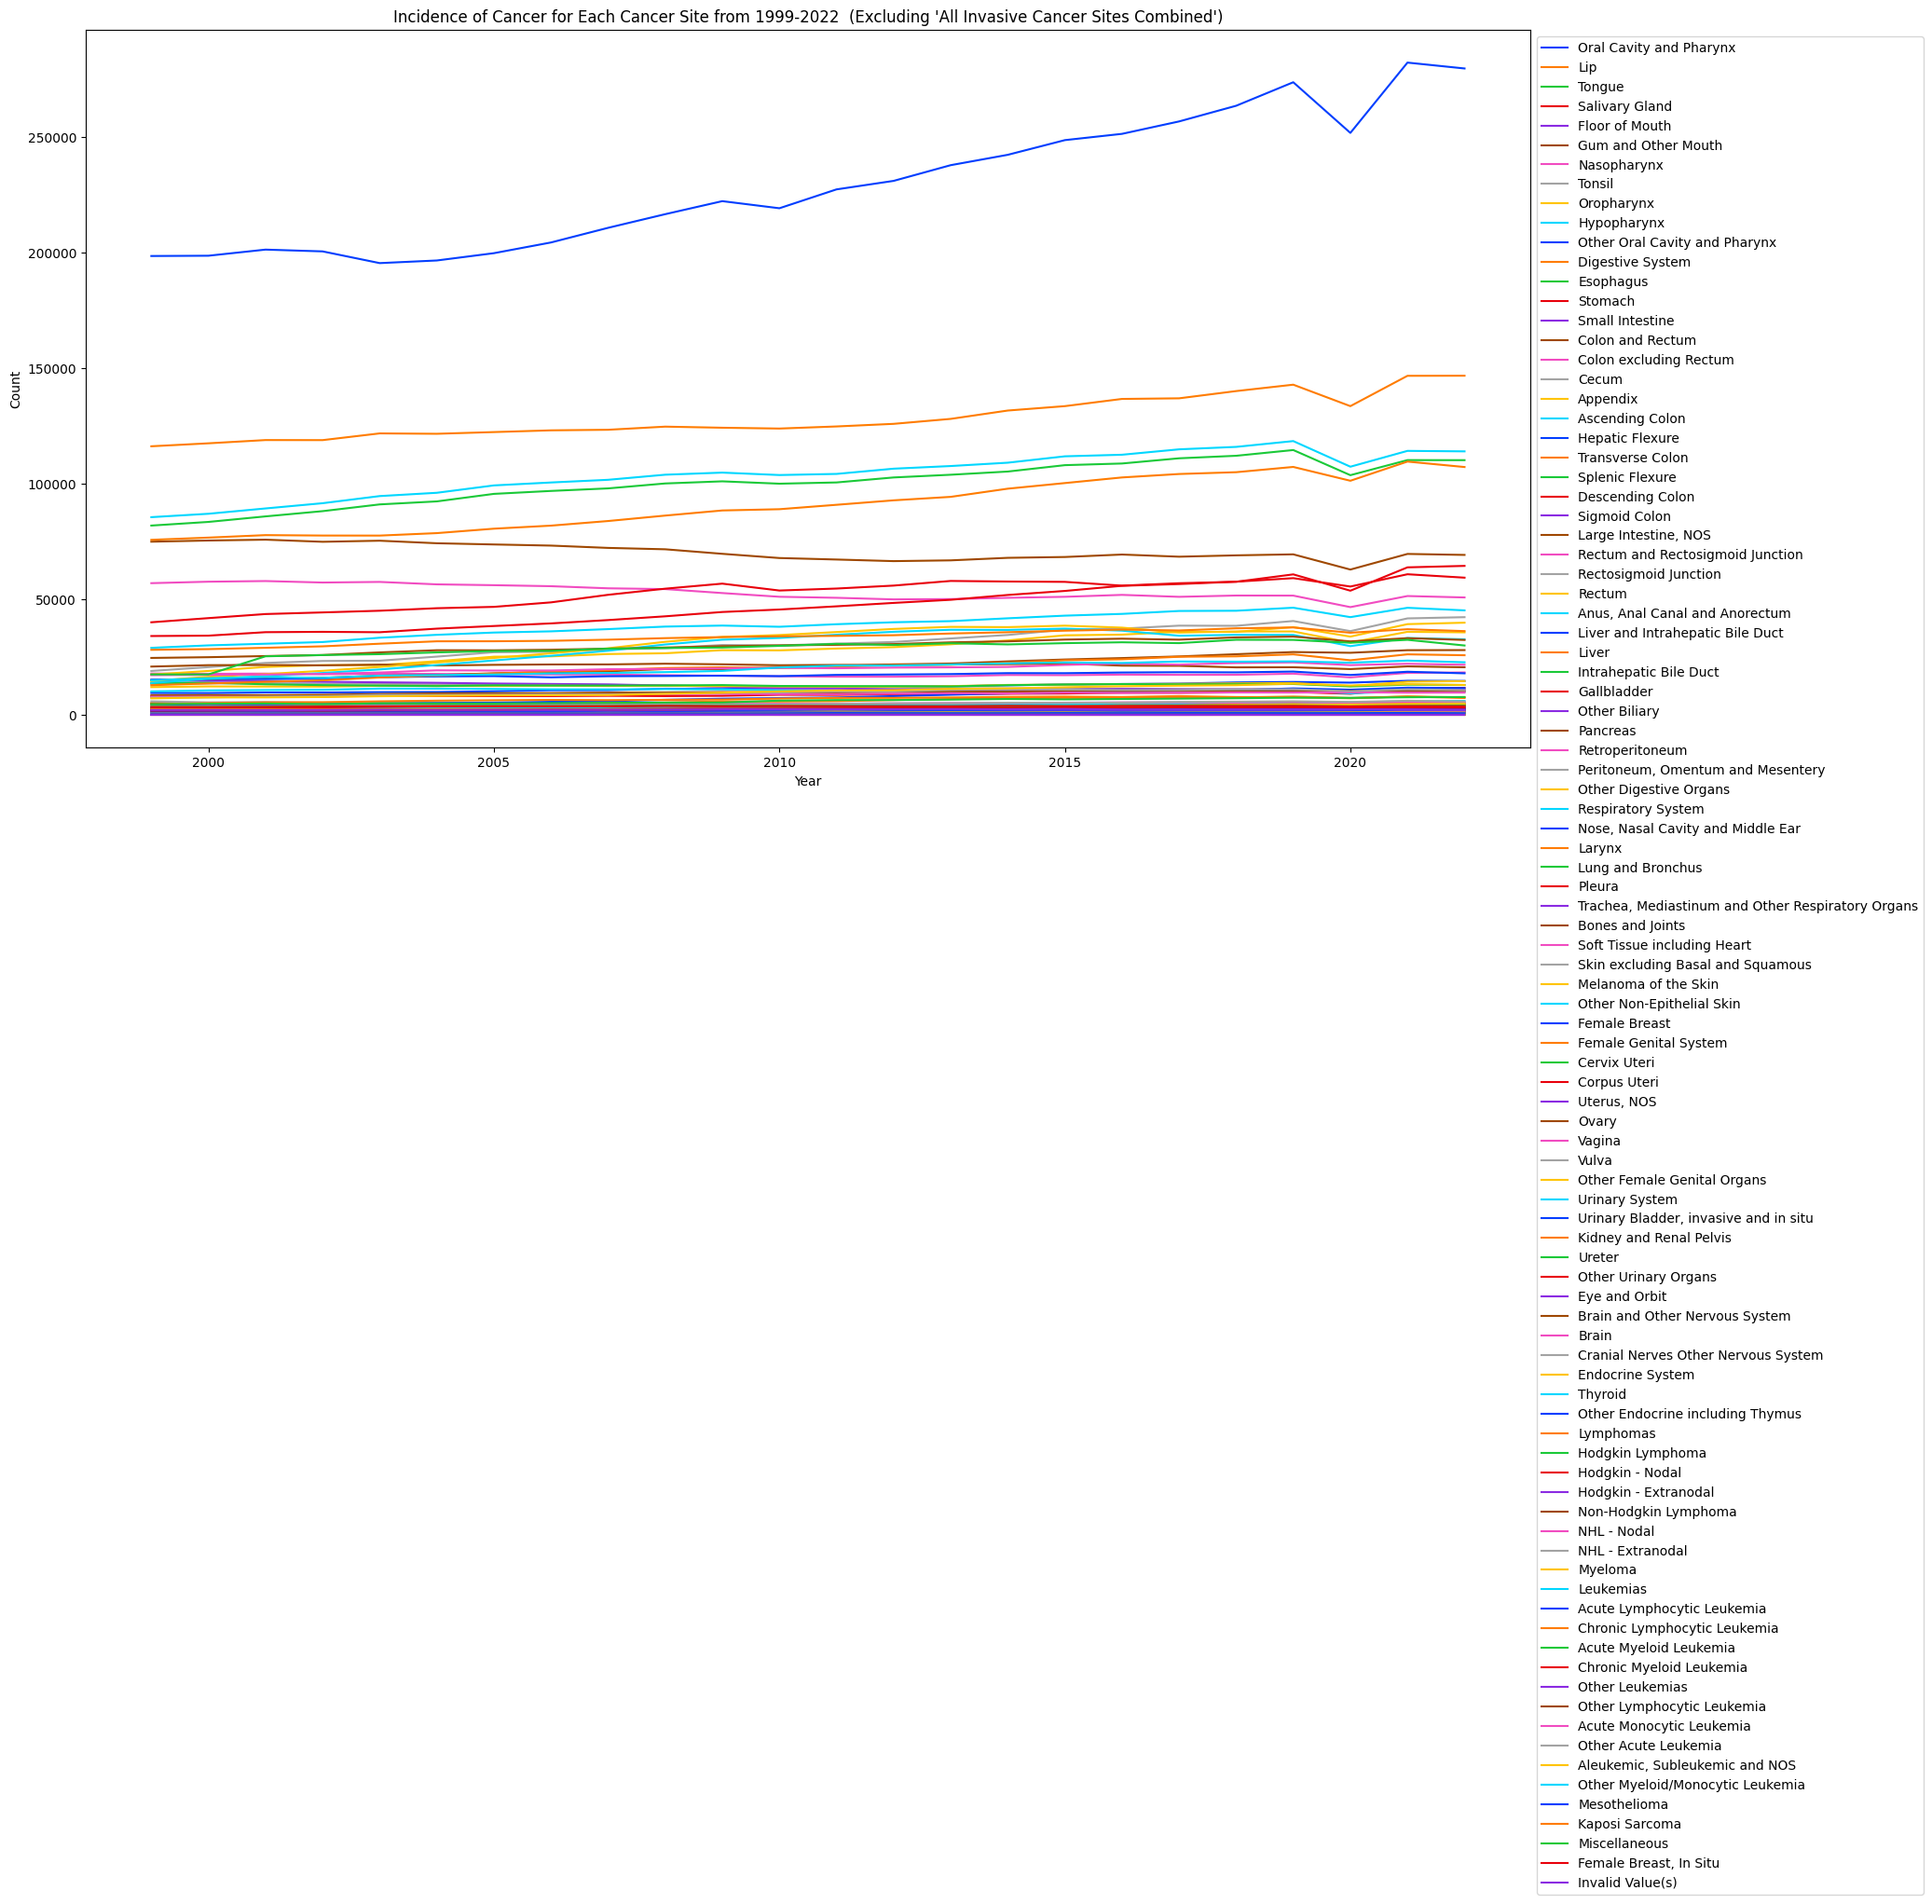

In [282]:
# set the figure size to larger than default to help make it more readable
plt.figure(figsize=(20.0, 10.0))
# create seaborn lineplot with female cancer data, one line in a different color per cancer site
# using bright color palette to try to make the different lines clearer
sns.lineplot(data = df_cancer_females_excl_allinv, x= 'Year', y= 'Count', hue = 'Cancer Sites', palette= 'bright')
plt.title("Incidence of Cancer for Each Cancer Site from 1999-2022  (Excluding 'All Invasive Cancer Sites Combined')")

# default legend location covered the plot.  moving outside of plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


Including 'All Invasive Cancer Sites Combined'

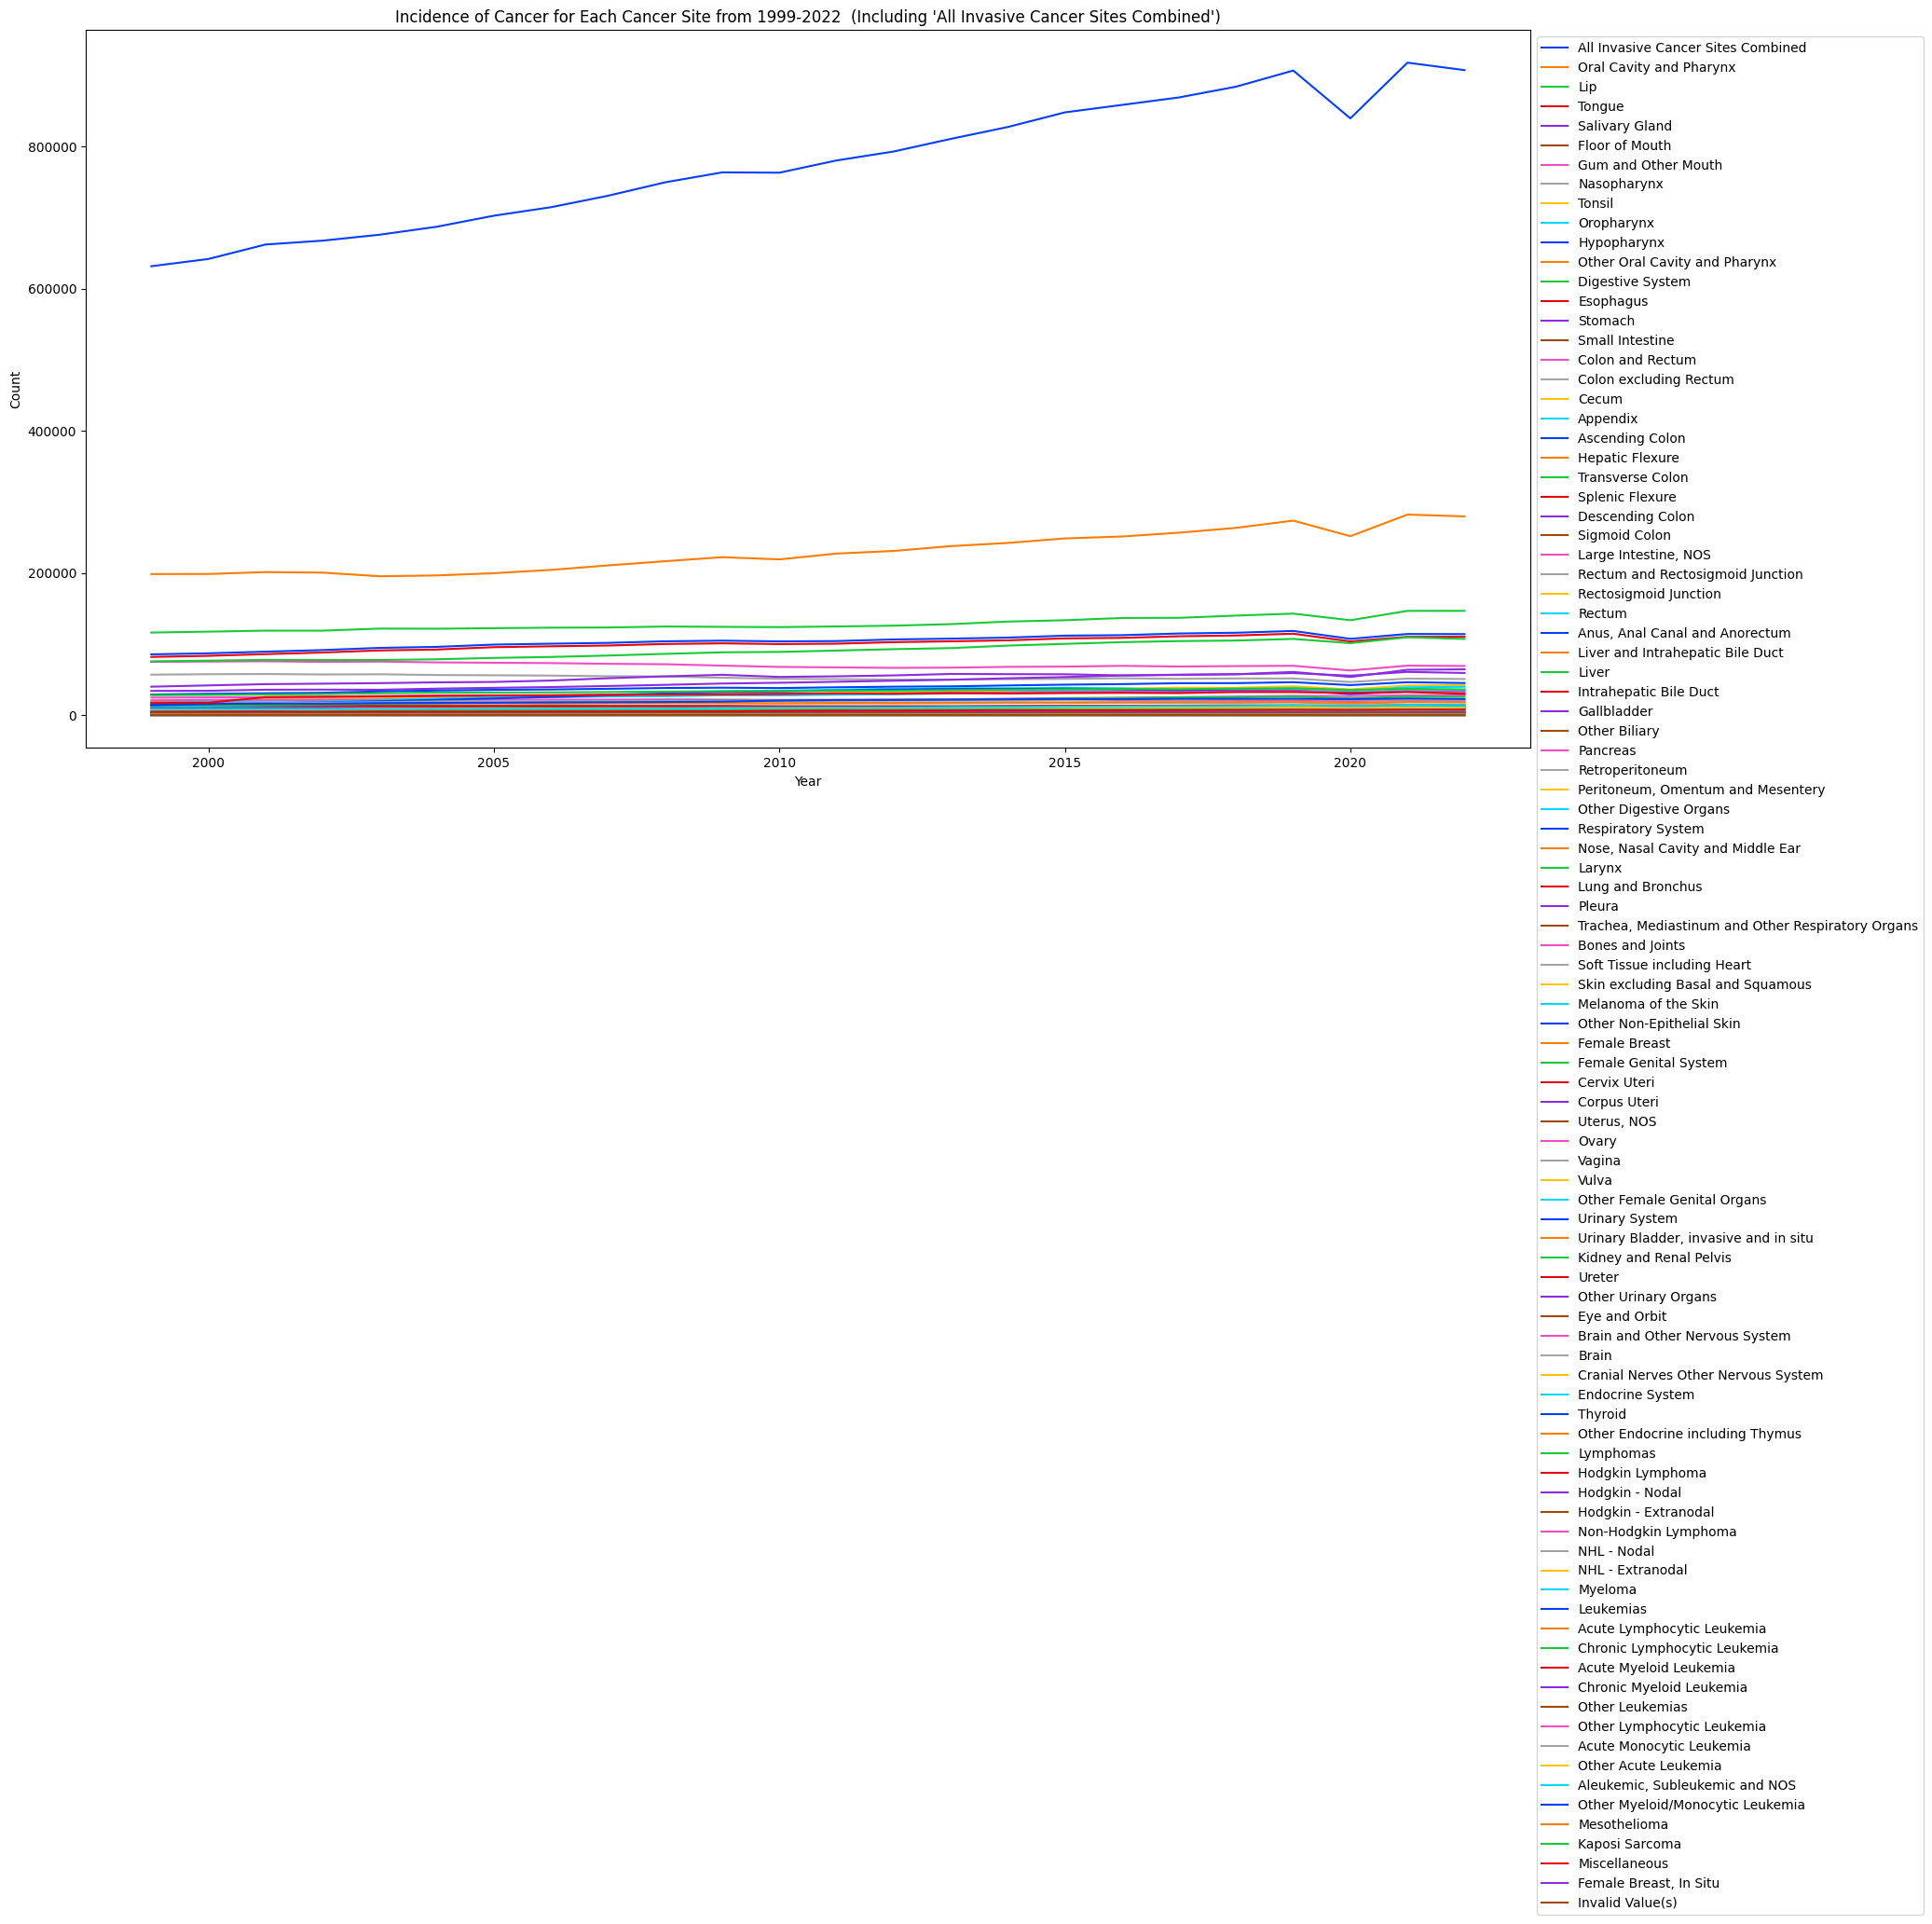

In [283]:

plt.figure(figsize=(20.0, 10.0))
sns.lineplot(data = df_cancer_females, x= 'Year', y= 'Count', hue = 'Cancer Sites', palette= 'bright')
# default legend location covered the plot.  moving outside of plot
plt.title("Incidence of Cancer for Each Cancer Site from 1999-2022  (Including 'All Invasive Cancer Sites Combined')")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# 5. Scatter plot for 2020

Create a scatter plot with a single marker for each (site, sex) pair in 2000, with x-axis = population, y-axis = incidence of cancer cases. Use a different color marker for Males and Females

Excluding 'All Invasive Cancer Sites Combined' shown
Including 'All Invasive Cancer Sites Combined' follows below

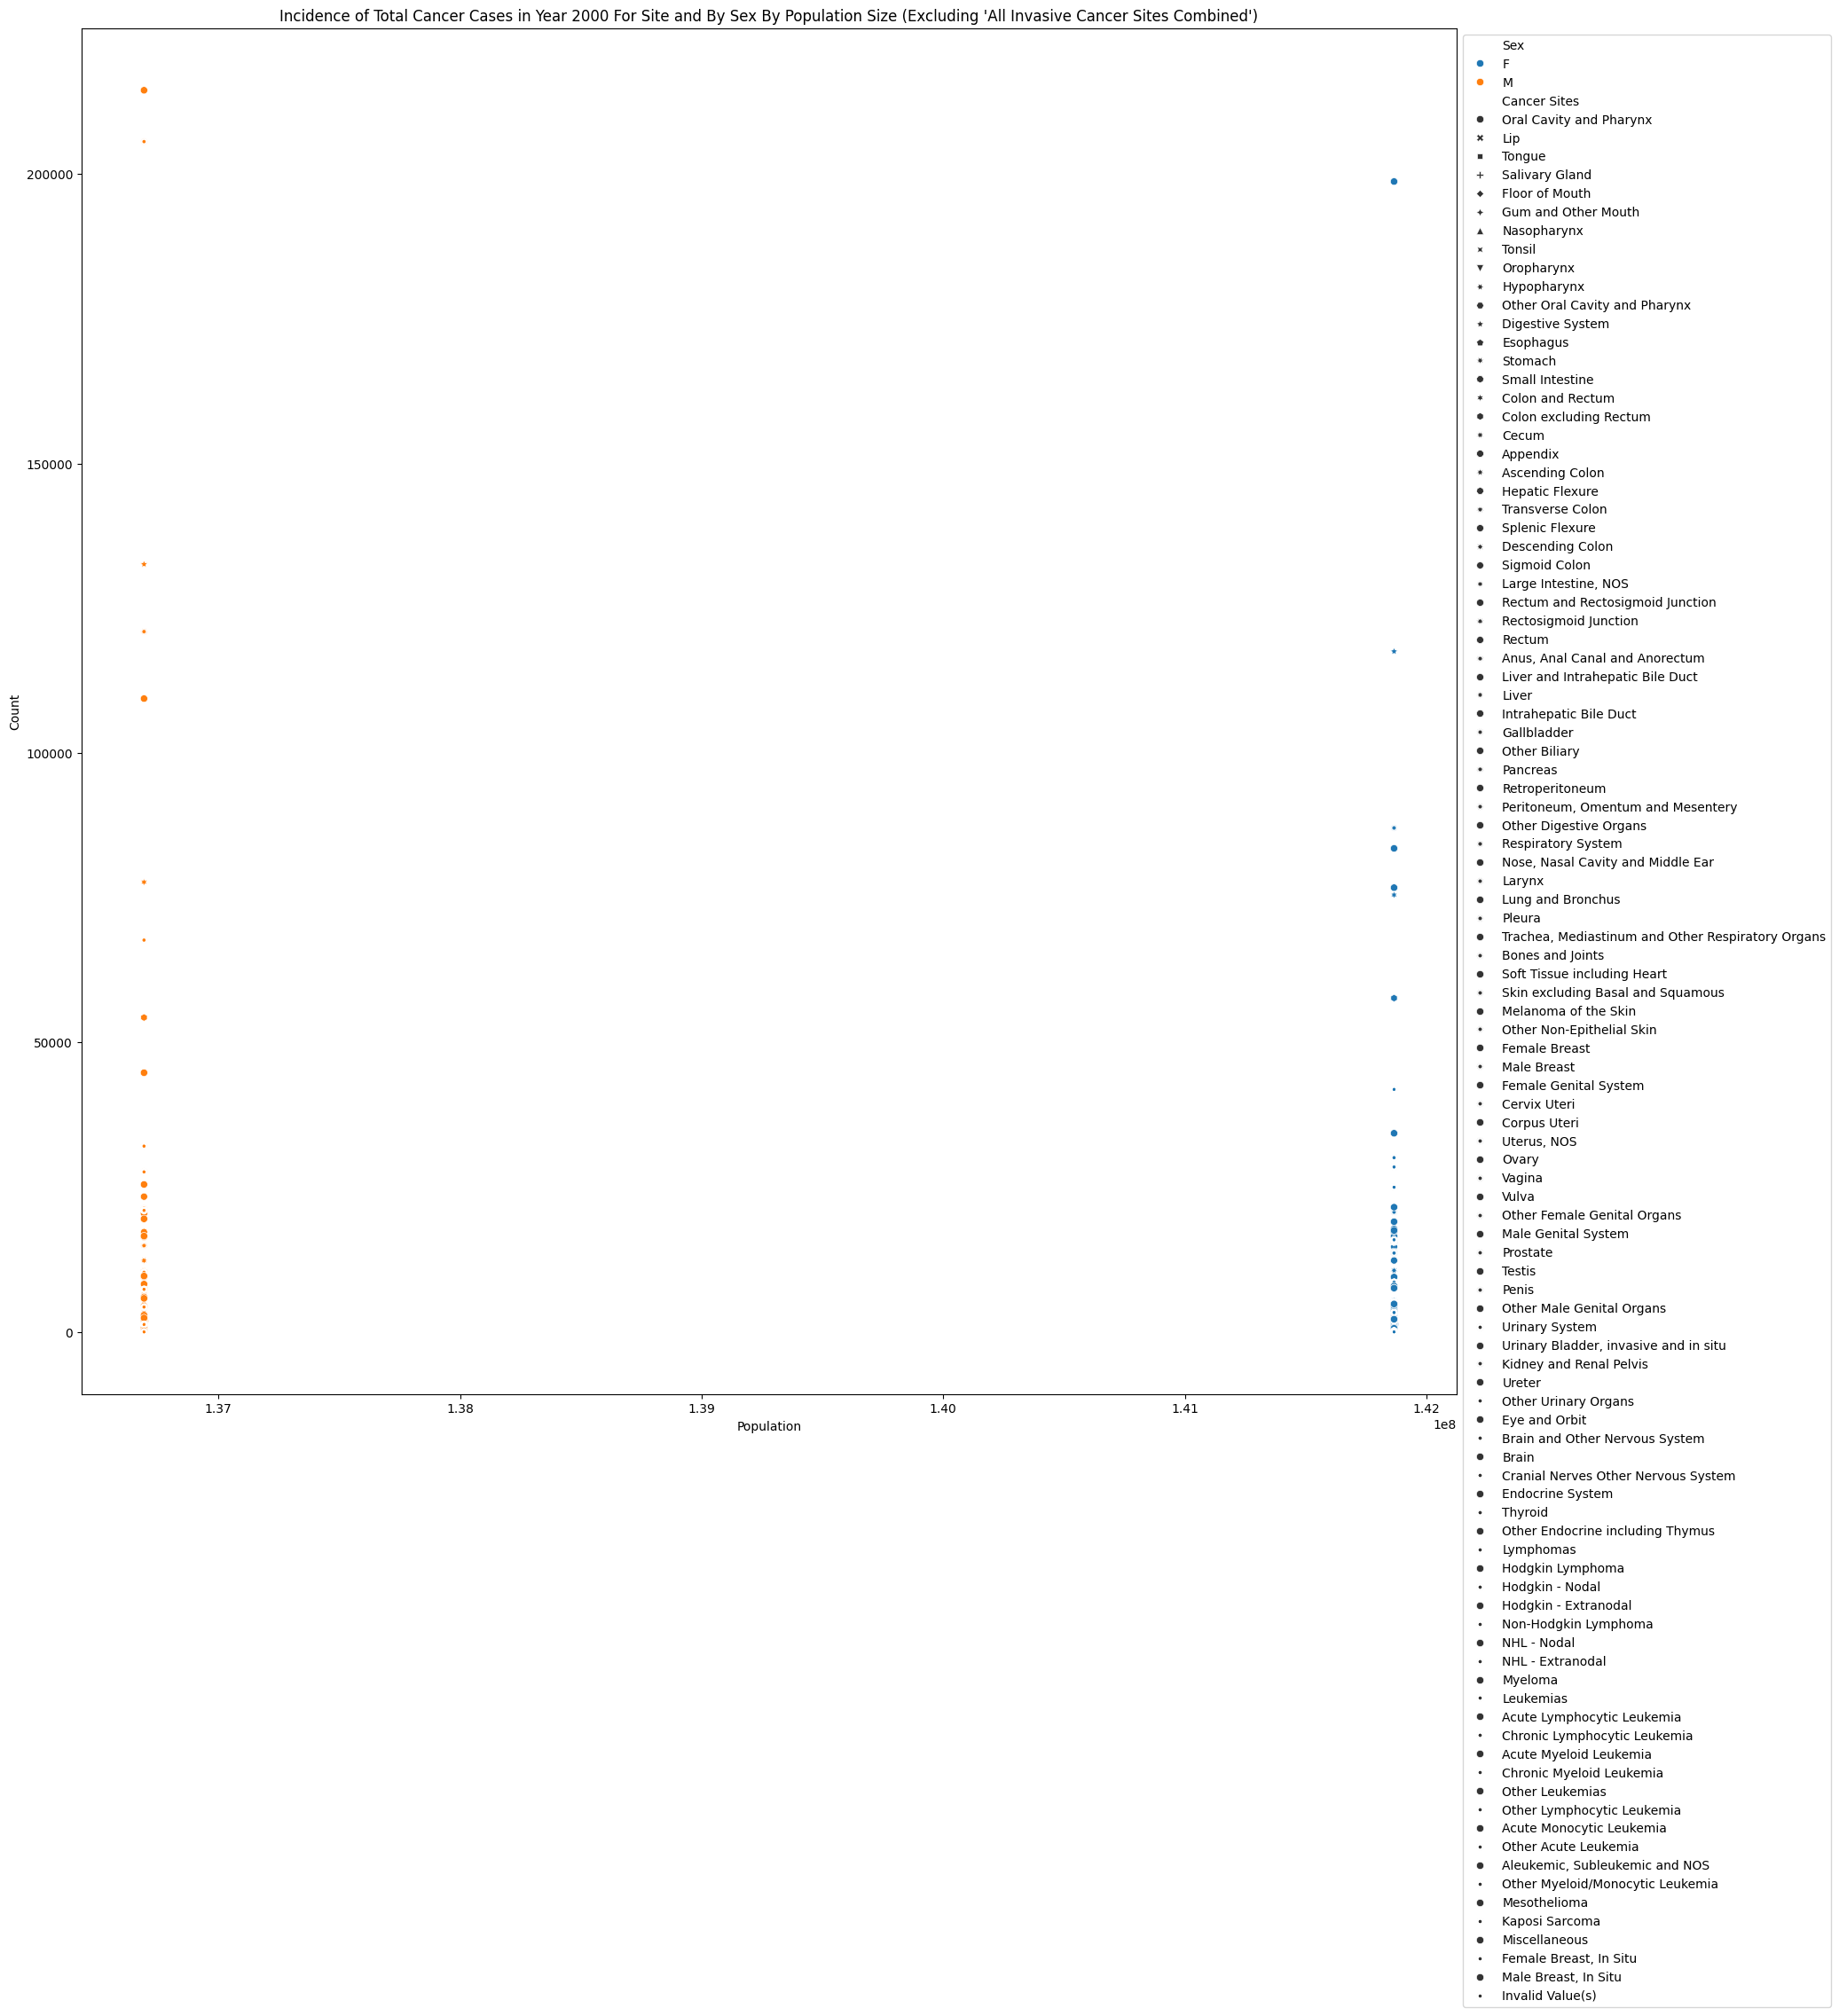

In [284]:
#choose just the results for year 2000 excluding all invasive combined
df_year2000_results_exl_allinv = df_cancer_clean_nonredundant_excl_allinv[df_cancer_clean_nonredundant_excl_allinv['Year'] == 2000]
plt.figure(figsize=(20.0, 20.0))
sns.scatterplot(data = df_year2000_results_exl_allinv, x='Population', y='Count', hue='Sex', style='Cancer Sites')
plt.title("Incidence of Total Cancer Cases in Year 2000 For Site and By Sex By Population Size (Excluding 'All Invasive Cancer Sites Combined')")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

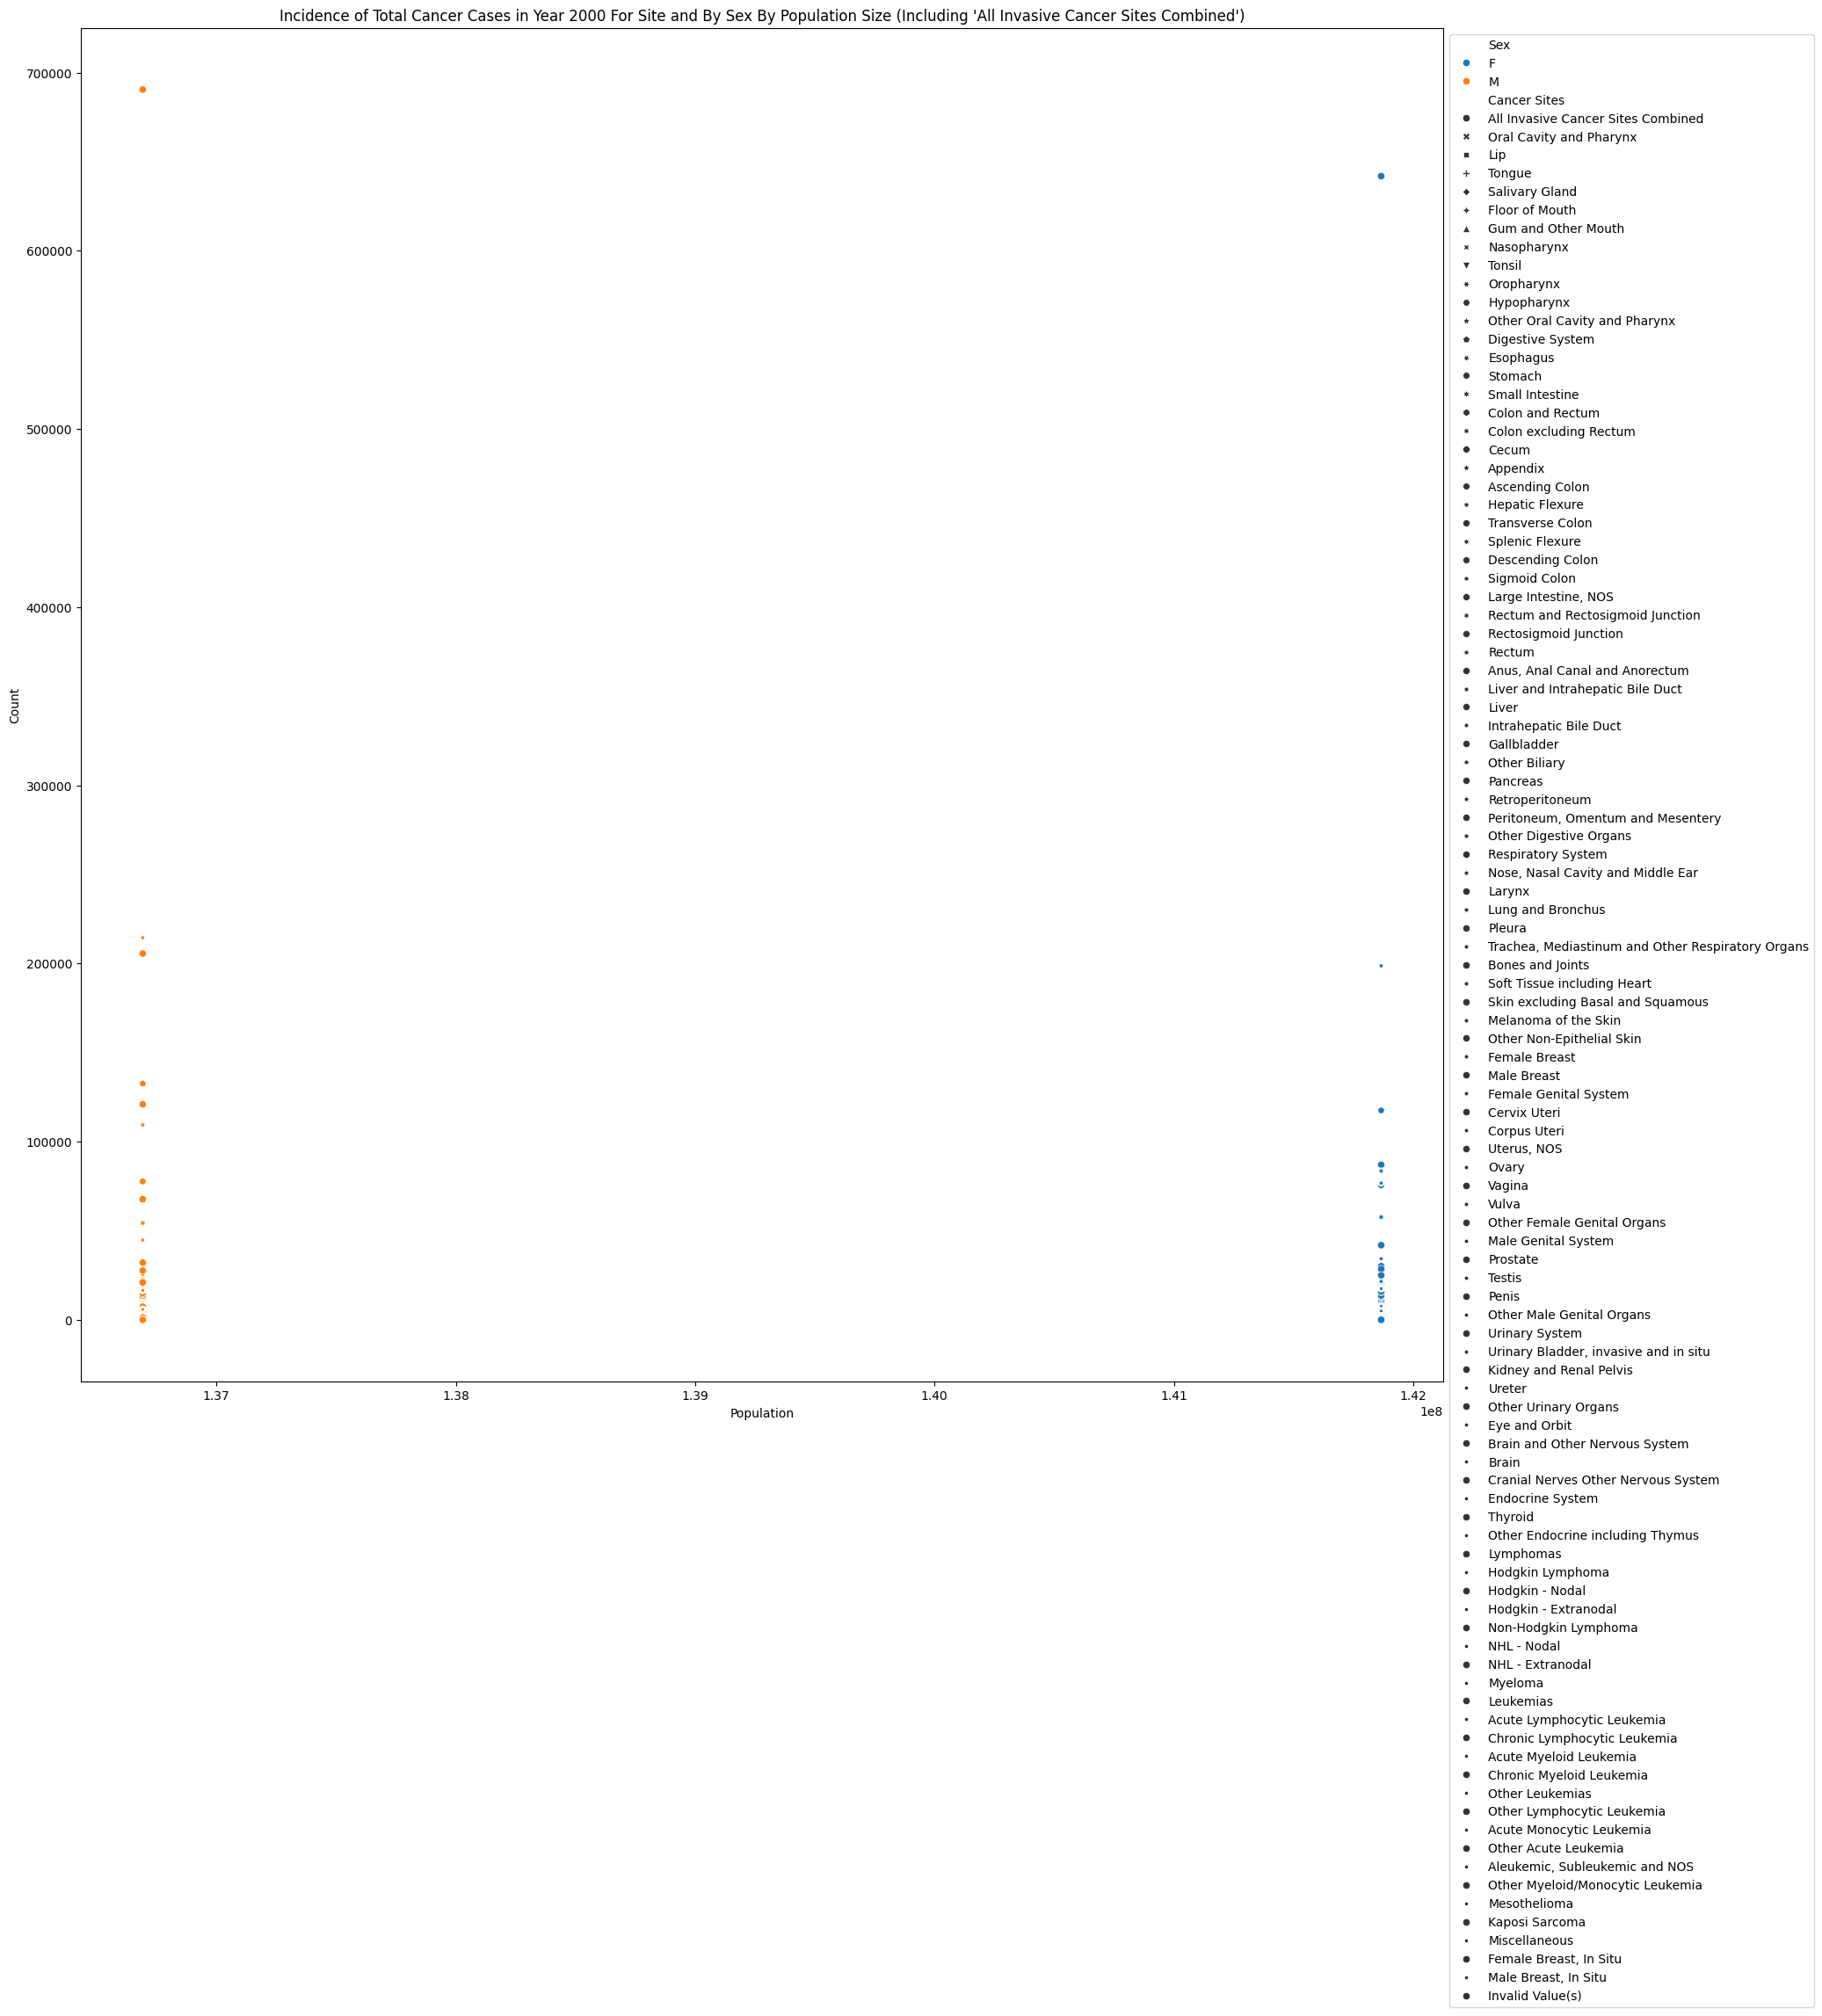

In [285]:

df_year2000_results = df_cancer_clean_nonredundant[df_cancer_clean_nonredundant['Year'] == 2000] #choose just the results for year 2000
df_year2000_results

plt.figure(figsize=(20.0, 20.0))
sns.scatterplot(data = df_year2000_results, x='Population', y='Count', hue='Sex', style='Cancer Sites')
plt.title("Incidence of Total Cancer Cases in Year 2000 For Site and By Sex By Population Size (Including 'All Invasive Cancer Sites Combined')")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Sanity check - the plots above look weird, but then make sense after looking back at the data and seeing that the male population is the same for all Cancer Sites and the female population is the same for all cancer sites

# 6. Bar plot for each site

Create a bar plot with a bar for each individual cancer site (excluding the all-inclusive case), and bar length based on the incidence of new cases for males in the year 2000

Excluding All Invasive Combined shown

Including All Invasive Combined follows below

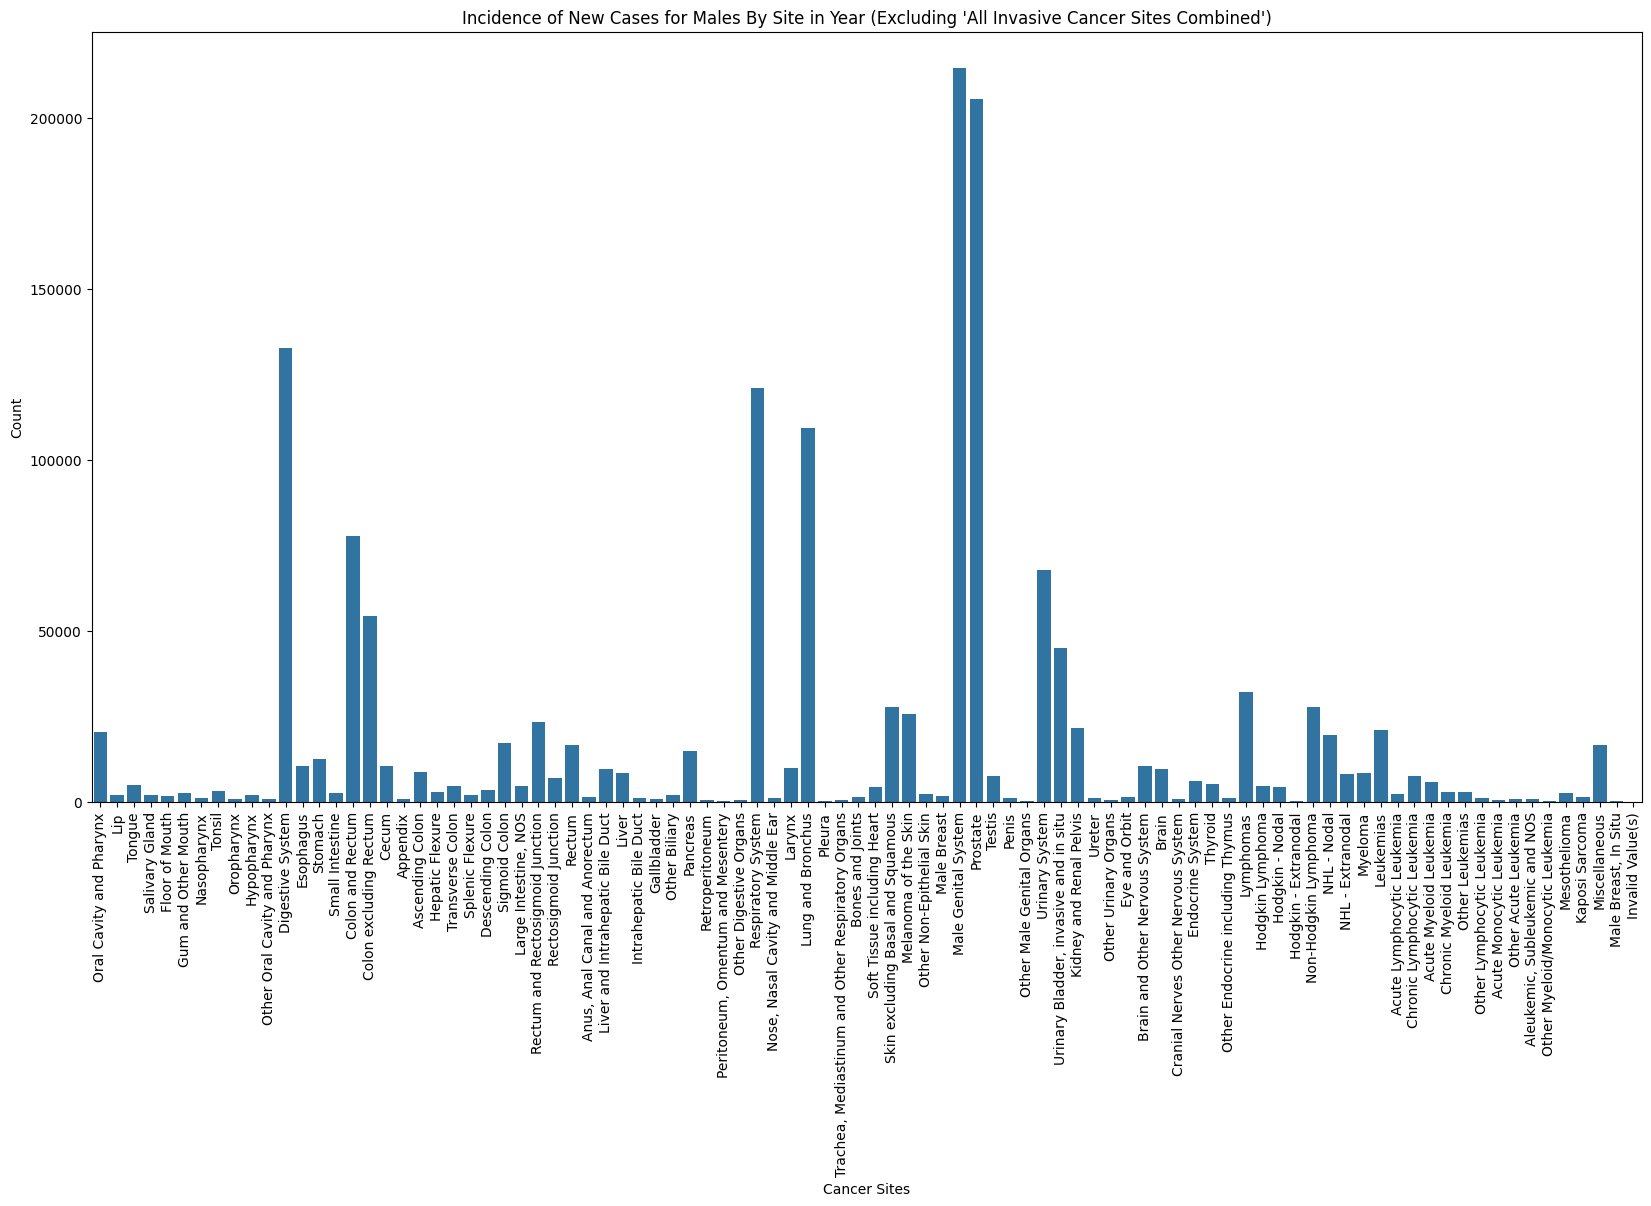

In [286]:
plt.figure(figsize=(20.0, 10.0))
# select the rows that are for only males only for the year 2000
df_cancer_males = df_cancer_clean_nonredundant_excl_allinv[(df_cancer_clean_nonredundant_excl_allinv['Sex'] == 'M') & (df_cancer_clean_nonredundant_excl_allinv['Year'] == 2000)] 
# default x labels are horizontal and overlap eachother.  Rotating 90 degrees for readability
plt.xticks(rotation = 90)
# create bar plot with male only cancer data, Cancer Sites on x axis, Count on y axis
plt.title("Incidence of New Cases for Males By Site in Year (Excluding 'All Invasive Cancer Sites Combined')")
male_cancer_barplot = sns.barplot(data=df_cancer_males, x='Cancer Sites', y='Count')

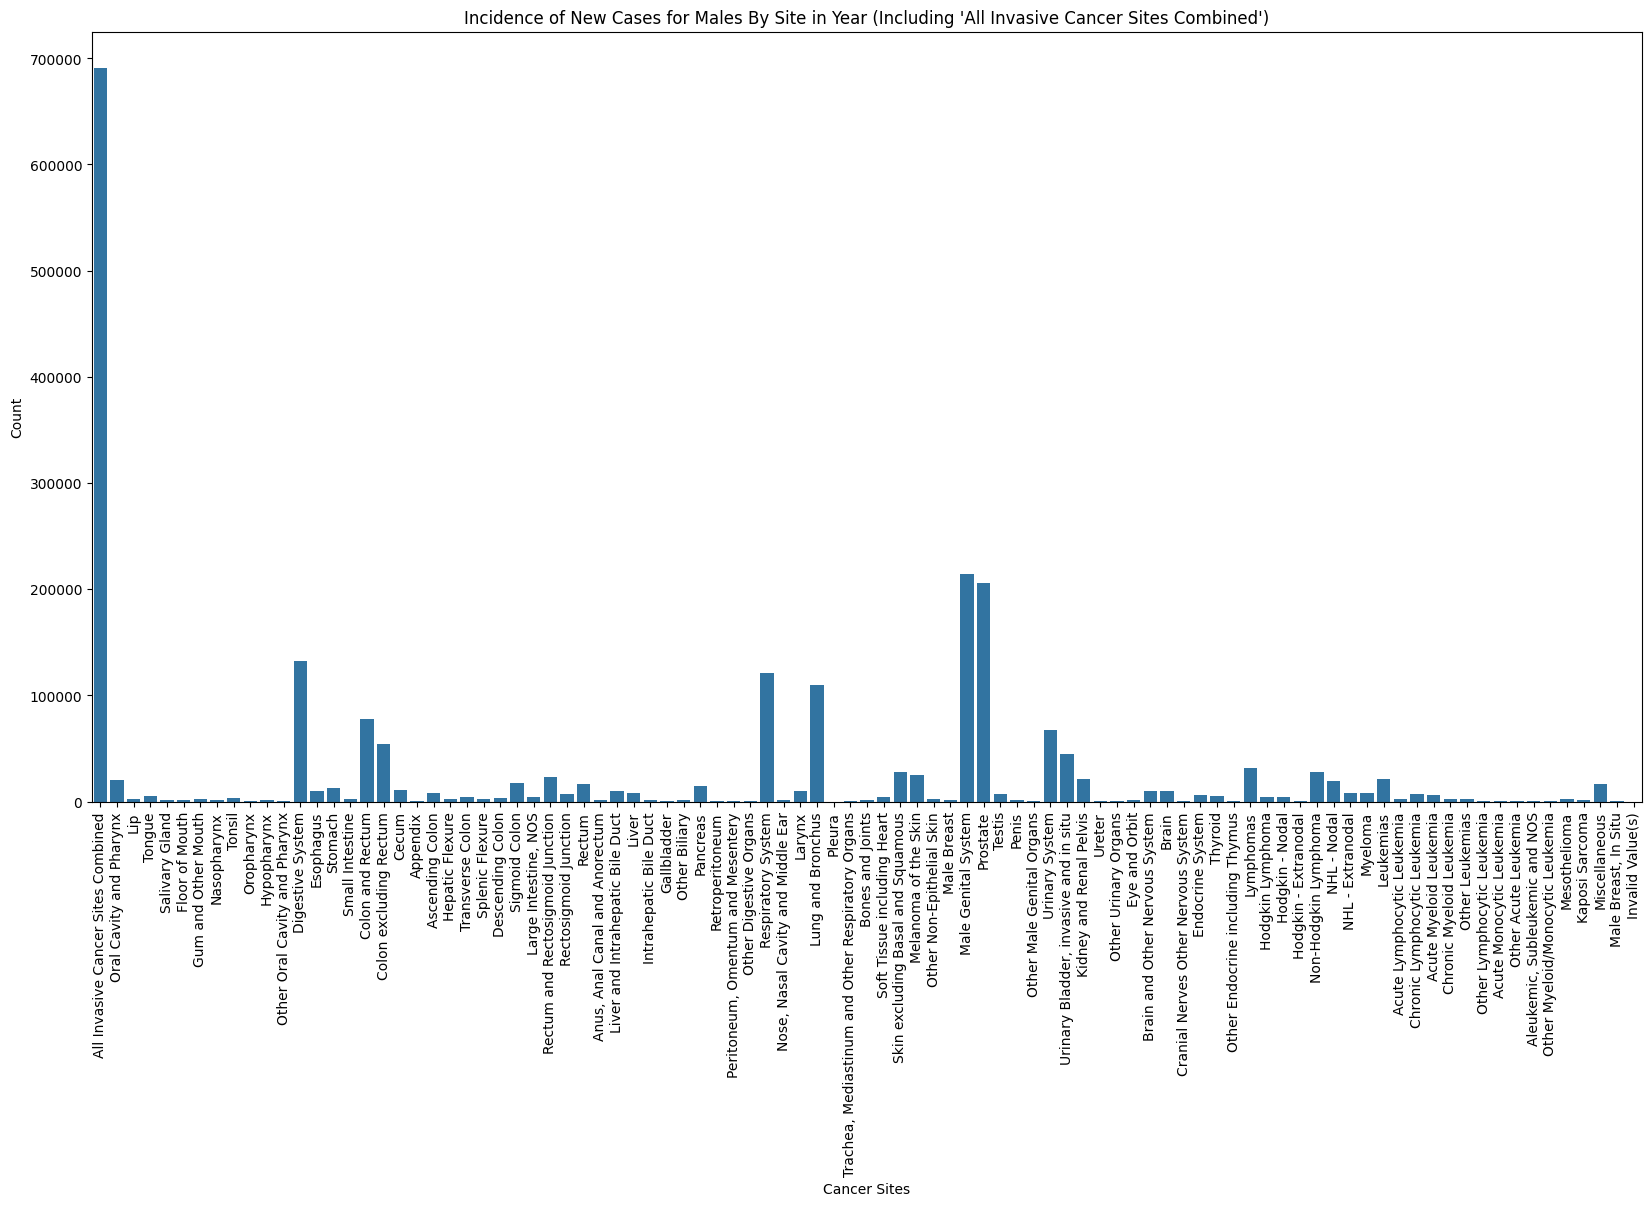

In [271]:
plt.figure(figsize=(20.0, 10.0))
# select the rows that are for only males only for the year 2000
df_cancer_males = df_cancer_clean_nonredundant[(df_cancer_clean_nonredundant['Sex'] == 'M') & (df_cancer_clean_nonredundant['Year'] == 2000)] 
# default x labels are horizontal and overlap eachother.  Rotating 90 degrees for readability
plt.xticks(rotation = 90)
# create bar plot with male only cancer data, Cancer Sites on x axis, Count on y axis
plt.title("Incidence of New Cases for Males By Site in Year (Including 'All Invasive Cancer Sites Combined')")
male_cancer_barplot = sns.barplot(data=df_cancer_males, x='Cancer Sites', y='Count')

# 7. Higher Incidence Between Sexes

For each cancer site and each year, determine whether males or females had the higher incidence

In [272]:
# nonredundant data
# group by cancer site, year, and sex
grpd_cancer_clean_yr_st_sx = df_cancer_clean_nonredundant.groupby(['Cancer Sites', 'Year', 'Sex'])
# sum
df_cancer_clean_yr_st_sx_grpd =grpd_cancer_clean_yr_st_sx.sum() 

# in each group find the index (row number) of the sex that had the largest count
idx2 = df_cancer_clean_nonredundant.groupby(['Cancer Sites', 'Year'])['Count'].idxmax()

# Display Results 
print("Sex with the highest incidence of the listed Cancer Site for the listed year: ")
df_cancer_clean_nonredundant.loc[idx2][['Cancer Sites', 'Year', 'Sex']]

Sex with the highest incidence of the listed Cancer Site for the listed year: 


,Cancer Sites,Year,Sex
3865,Acute Lymphocytic Leukemia,1999,M
3867,Acute Lymphocytic Leukemia,2000,M
3869,Acute Lymphocytic Leukemia,2001,M
3871,Acute Lymphocytic Leukemia,2002,M
3873,Acute Lymphocytic Leukemia,2003,M
...,...,...,...
2707,Vulva,2018,F
2708,Vulva,2019,F
2709,Vulva,2020,F
2710,Vulva,2021,F



# 8. Pivot table for cancer / year

Create a pivot table with a row for each cancer site, column for each year, and a value equal to the total incidence of males and females combined


In [273]:
print("Total incidence of males and females combined per Cancer Site per Year")
# new pivoted data frame using pandas pivot table 
df_cancer_pivot = pd.pivot_table(
    df_cancer_clean_nonredundant,   # dataframe the data is currently in 
    index = 'Cancer Sites',         # index for pivoted table
    columns = 'Year',               # columns for pivoted table
    values = 'Count',               # values for pivoted table
    aggfunc = 'sum')                # aggregation function used in pivoted table 
df_cancer_pivot                     # display new pivot table


Total incidence of males and females combined per Cancer Site per Year


Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Cancer Sites,,,,,,,,,,,,,,,,,,,,,
Acute Lymphocytic Leukemia,3840,4049,4159,4122,4208,4429,4342,4550,4678,4884,...,4872,5091,5396,5416,5403,5705,5585,5545,5434,5439
Acute Monocytic Leukemia,549,590,690,704,767,783,774,767,934,823,...,678,684,698,688,665,673,631,571,548,446
Acute Myeloid Leukemia,10000,10644,10776,10452,10844,10901,10737,11060,11200,11644,...,14955,15521,15344,15706,15742,16405,16971,16604,17135,17266
"Aleukemic, Subleukemic and NOS",1385,1403,1390,1412,1512,1507,1569,1603,1820,1771,...,2379,2336,2427,2127,2235,2367,2313,2368,2446,2248
All Invasive Cancer Sites Combined,1304271,1332566,1377750,1394720,1408190,1431604,1460548,1496800,1542471,1565155,...,1640952,1667957,1713267,1740066,1774849,1806799,1858563,1718755,1869872,1851238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Urinary Bladder, invasive and in situ",59051,60389,60862,62138,63836,65631,66706,65849,67731,68898,...,74645,75838,76475,77151,78207,77801,78932,74953,79510,76529
Urinary System,94493,97794,100484,103705,108290,112325,115844,117595,121451,125054,...,137170,140841,144305,146994,150071,151149,155416,145779,155747,151549
"Uterus, NOS",1173,1236,1244,1276,1313,1246,1297,1266,1293,1445,...,1685,1874,1936,1963,1927,2063,2244,2029,2280,2080
